# Understanding and Predicting Loan Approval Process

### Objective:

- To create a model that predicts the approval of an individual's loan application based on their attributes.

### The Problem:

One of the most common problems for financial companies is to evaluate whether they should approve an individual's loan since the profile of every person is different from each other so it takes a lot of calculation to accurately decide the approval or the rejection of loan application.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
loan_df = pd.read_csv("train.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
loan_df.shape

(614, 13)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Here, 7 columns have NULL values (Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History) which I will fill by mode or median imputation technique.

Loan_Status
Y    422
N    192
Name: count, dtype: int64


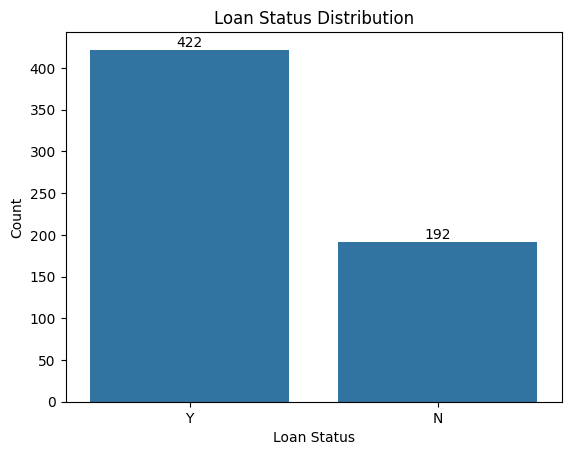

In [7]:
print(loan_df['Loan_Status'].value_counts())
ax = sns.countplot(x='Loan_Status', data=loan_df)
ax.bar_label(ax.containers[0], label_type='edge')

plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [8]:
loan_df['Loan_Status'] = loan_df['Loan_Status'].map({'Y':1, 'N':0})
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


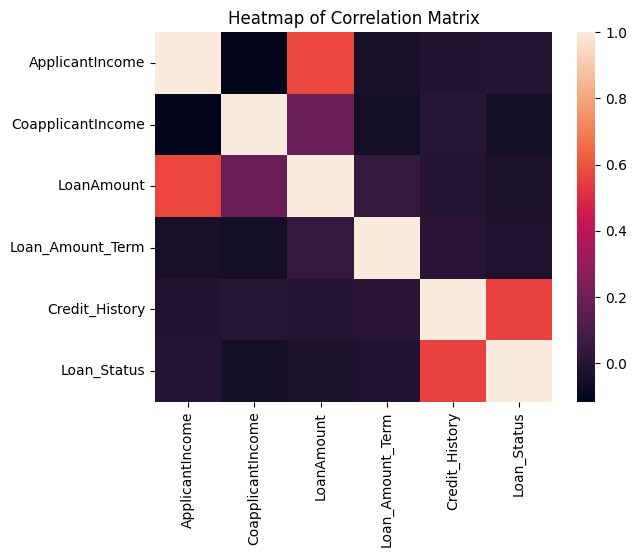

In [9]:
corr = loan_df.corr(numeric_only=True)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

Here, Credit_History emerged as the strongest predictor (corr=0.56), suggesting banks heavily weigh past credit behavior.


Gender Value Counts:
Gender
Male      489
Female    112
Name: count, dtype: int64


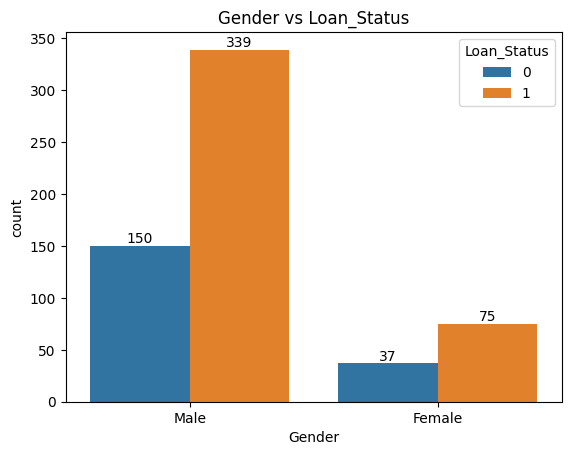


Married Value Counts:
Married
Yes    398
No     213
Name: count, dtype: int64


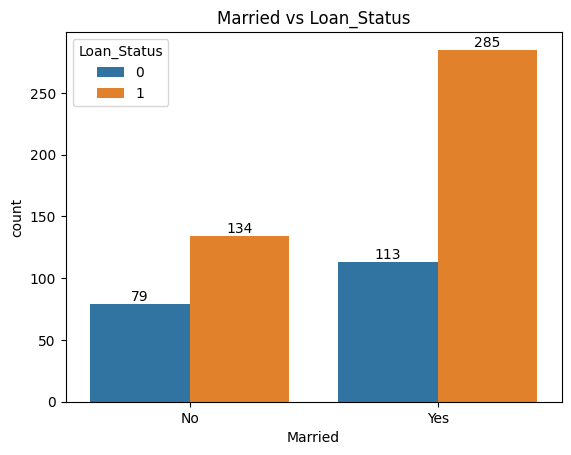


Dependents Value Counts:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


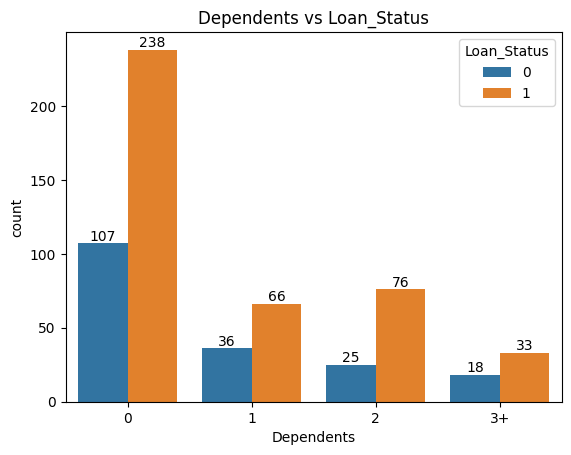


Education Value Counts:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


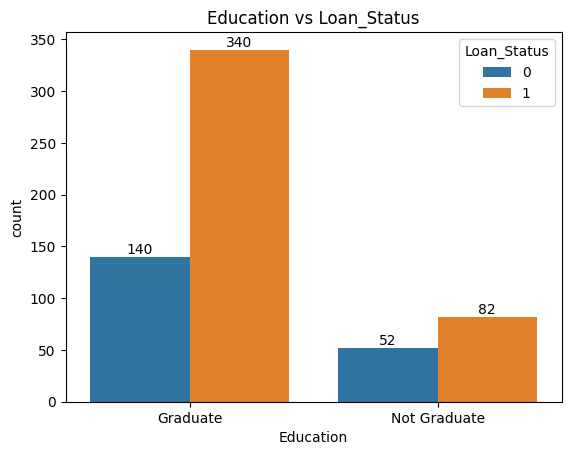


Self_Employed Value Counts:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


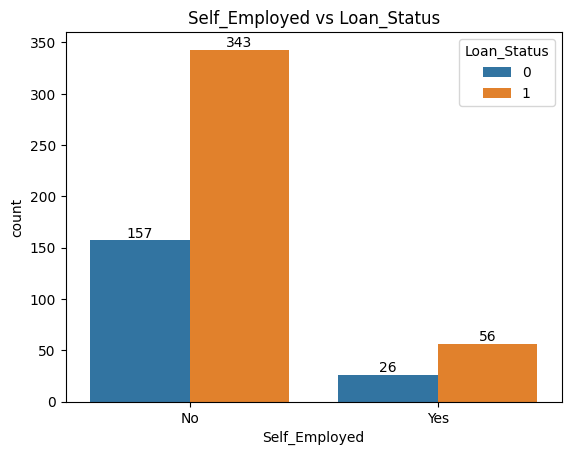


Property_Area Value Counts:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


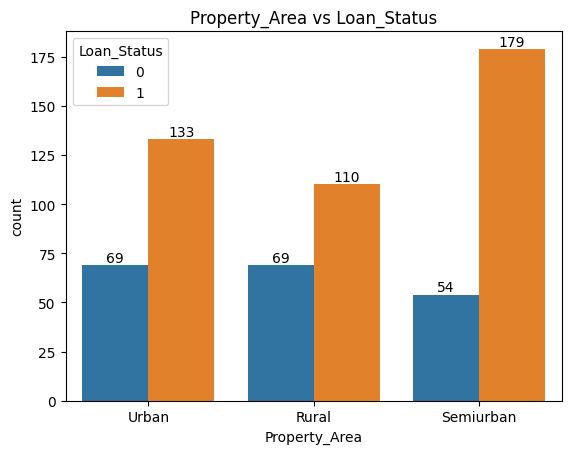

In [10]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in cat_cols:
  print(f'\n{col} Value Counts:')
  print(loan_df[col].value_counts())
  ax=sns.countplot(x=col, hue='Loan_Status', data=loan_df)
  for container in ax.containers:
    ax.bar_label(container, label_type='edge')
  plt.title(f"{col} vs Loan_Status")
  plt.show()

The above charts reveals several key insights:
1. **Gender**: Males exhibit a higher likelihood of loan approval compared to females, possibly reflecting a larger proportion of male applicants.
2. **Marital Status**: Married individuals are more likley to secure loan approvals than their unmarried counterparts, potentially due to perceived financial stability or joint income considerations.
3. **Dependents**: Applicants with no dependents demonstrate a higher loan approval ratio, suggesting that fewer financial obligations may enhance approval odds.
4. **Education**: Graduates consistently show higher approval rates than non-graduates, likely due to better income prospects or creditworthiness associated with higher education.
5. **Employment Type**: Self-Employed individuals face lower approval chances compared to those employed by others, possibly reflecting the perceived risk of irregular income streams.
6. **Property Area**: Residents of semiurban areas have the highest probability of loan approval, outperforming those who live in urban or rural areas, suggesting regional lending preferences or economic factors.


### Handling Null values by median and mode imputation techniques:

The columns with missing values are as follows:

Among them, these are the categorical columns (Gender, Married, Dependents,
Self_Employed) and these are numerical columns (LoanAmount, Loan_Amount_Term, Credit_History)

For numeric columns, median imputation technique is used since numeric data is often skewed while for categorical columns, mode imputation technique is used.

In [11]:
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median())
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].median())
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].median())

loan_df['Gender'] = loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])
loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])
loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])

In [12]:
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


### Encoding Categories

In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [14]:
loan_df['Gender'] = loan_df['Gender'].map({'Male': 1, 'Female': 0})
loan_df['Married'] = loan_df['Married'].map({'Yes': 1, 'No': 0})
loan_df['Dependents'] = loan_df['Dependents'].replace('3+', 3).astype(float)
loan_df['Education'] = loan_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_df['Self_Employed'] = loan_df['Self_Employed'].map({'Yes': 1, 'No': 0})
loan_df['ApplicantIncome'].astype(float)

loan_df = pd.get_dummies(loan_df, columns=['Property_Area'])

In [15]:
loan_df = loan_df.drop('Loan_ID', axis=1)

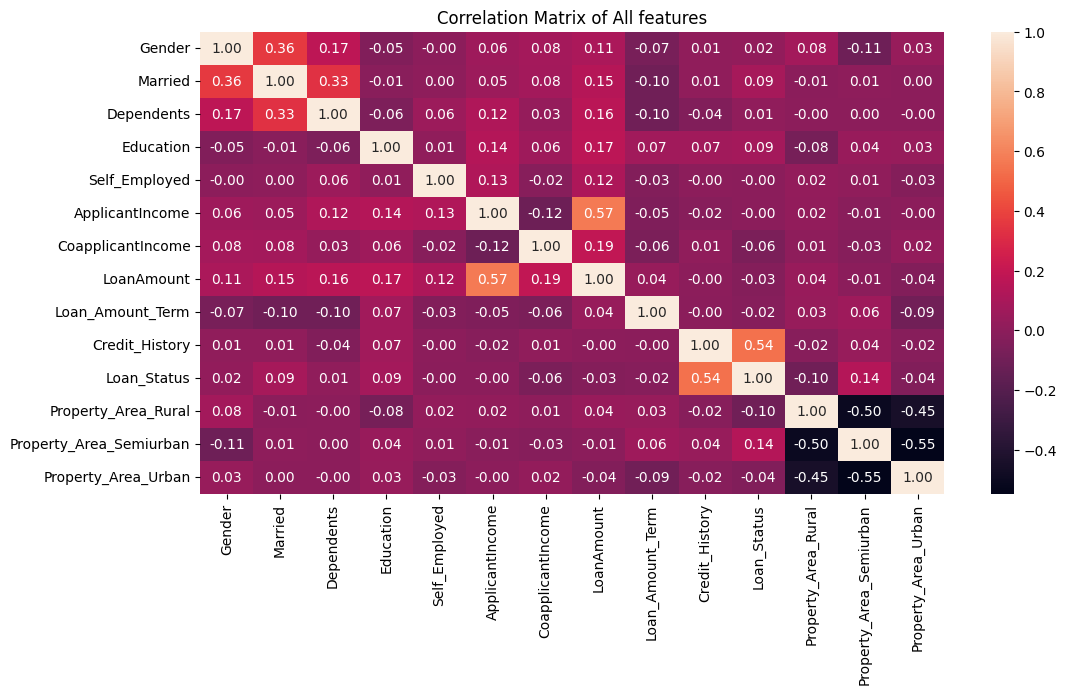

In [16]:
plt.figure(figsize=(12, 6))
corr = loan_df.corr()
sns.heatmap(corr,
            annot=True,
            fmt='.2f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Matrix of All features')
plt.show()

While Credit_History has the strongest correlation with Loan_Status (0.54), it’s not "strong" (typically >0.7). This suggests that linear relationships alone may not fully explain loan approval decisions—non-linear patterns, interactions, or thresholds might be at play.

### 1. Explore Non-Linear Relationships

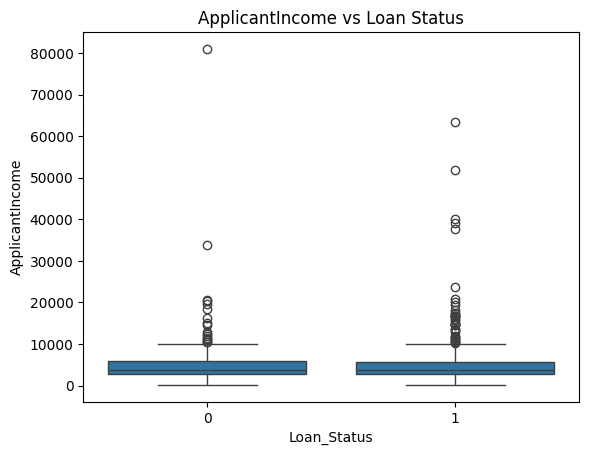

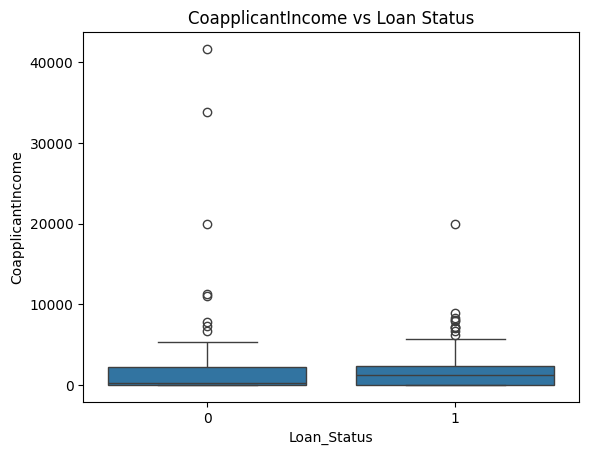

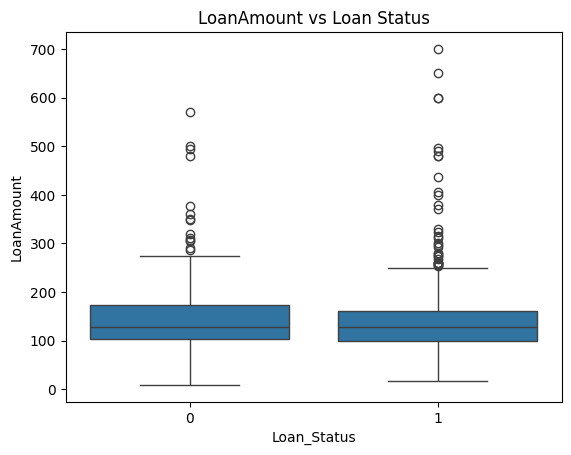

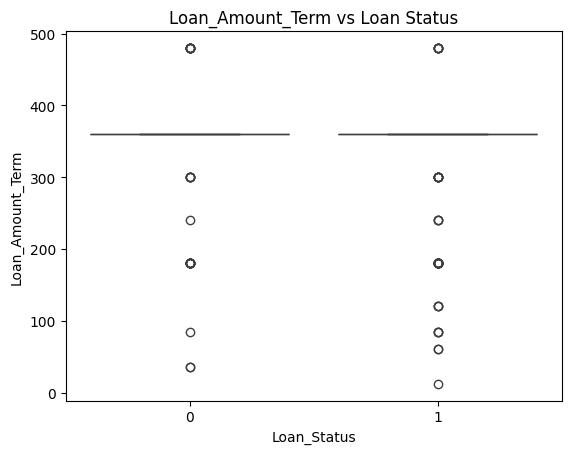

In [17]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numeric_cols:
  sns.boxplot(x='Loan_Status', y=col, data=loan_df)
  plt.title(f'{col} vs Loan Status')
  plt.show()

The above Box Plot shows:

**1. ApplicantIncome vs. Loan_Status**: The similar medians suggest ApplicantIncome alone doesn’t strongly differentiate between approved and rejected loans. High income doesn’t guarantee approval, as there are high-income outliers in both groups.

**2. CoapplicantIncome vs. Loan_Status**: The near-zero medians for "0" suggest many rejected applicants don’t have a coapplicant, so CoapplicantIncome could become a predictor for rejected cases.

**3. LoanAmount vs. Loan_Status**: Approved loans tend to have a slightly higher LoanAmount, which might reflect banks approving larger loans for more creditworthy applicants. The significant overlap in distributions suggests LoanAmount alone isn’t a strong discriminator—other factors (e.g., Credit_History) likely play a bigger role.

**4. Loan_Amount_Term vs. Loan_Status**: Most loans, whether approved or not, have a term of 360 months, suggesting Loan_Amount_Term has little direct impact on Loan_Status. This feature might not be very useful for modeling unless combined with other features (e.g., LoanAmount to compute monthly payments).


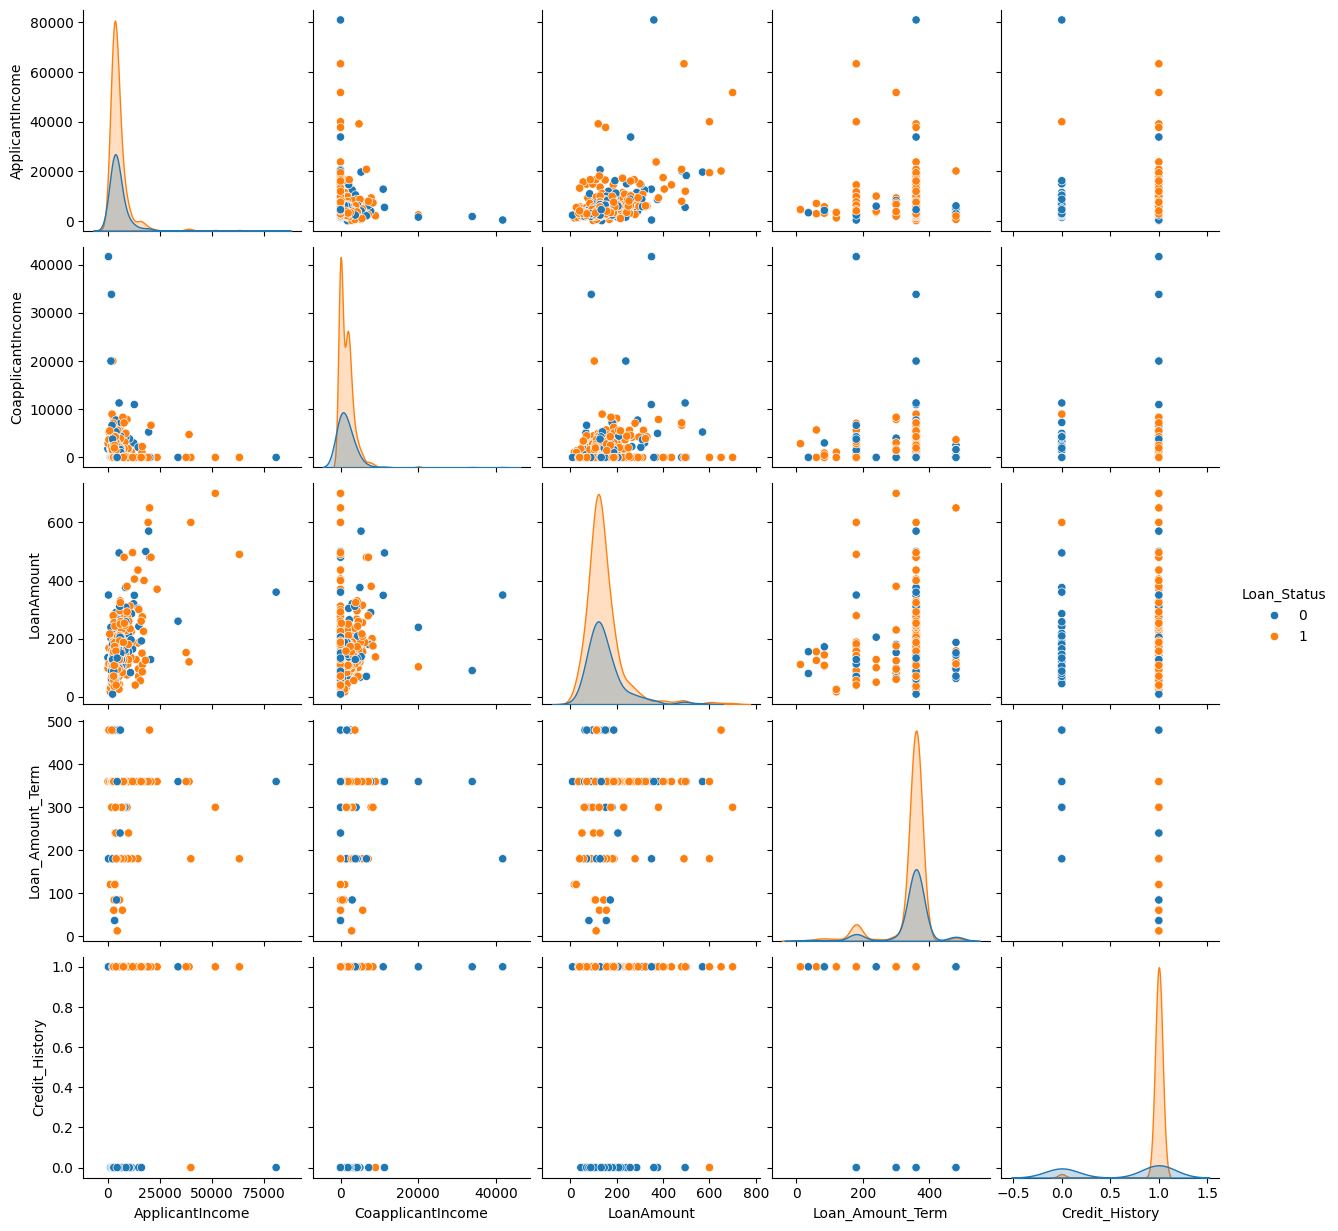

In [18]:
sns.pairplot(loan_df[numeric_cols + ['Loan_Status', 'Credit_History']], hue='Loan_Status')
plt.show()

The above Pairplot reveals key insights:

**1.** When Credit_History is 0, applications are rejected ~90% of the time.

**2.** High ApplicantIncome with zero CoapplicantIncome doesn’t guarantee approval. This suggests that other factors (e.g., Credit_History) outweigh income in these cases. Also, the KDE plot for CoapplicantIncome (diagonal) shows a large peak at 0 for both approved and rejected loans, meaning many applicants don’t have a coapplicant. This reinforces that CoapplicantIncome alone isn’t a strong predictor.

**3.** When CoapplicantIncome is highest but ApplicantIncome is close to 0, the loan is not approved. Banks likely prioritize the primary applicant’s financial stability. This pattern suggests creating a derived feature like total income (ApplicantIncome + CoapplicantIncome) might better capture overall financial capacity.

**4.** In LoanAmount or Loan_Amount_Term vs. ApplicantIncome scatter plot, even though ApplicantIncome is highest and LoanAmount or Loan_Amount_Term is not highest, the application is still rejected, perhaps because of bad credit history.

**5.** The skewness in ApplicantIncome, CoapplicantIncome, and LoanAmount confirms the need for transformation (e.g., np.log1p) to normalize these features for modeling.

**6.** For ApplicantIncome, CoapplicantIncome, and LoanAmount, the blue (0) and orange (1) KDE curves overlap significantly, indicating these features don’t strongly separate approved and rejected loans.

**7.** Credit_History is the strongest predictor, as noted in correlation (0.54). It consistently separates Loan_Status better than any other feature, making it a key focus for modeling.

### 2. Statistical Tests

Chi-Square Test for Categoricals:

In [19]:
from scipy.stats import chi2_contingency

cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area_Urban', 'Property_Area_Semiurban', 'Property_Area_Rural']
for col in cat_cols:
  contingency_table = pd.crosstab(loan_df[col], loan_df['Loan_Status'])
  chi2, p, _, _ = chi2_contingency(contingency_table)
  print(f'{col} vs Loan_Status: Chi2 p-value = {p:.4f}')

Gender vs Loan_Status: Chi2 p-value = 0.7391
Married vs Loan_Status: Chi2 p-value = 0.0296
Dependents vs Loan_Status: Chi2 p-value = 0.3689
Education vs Loan_Status: Chi2 p-value = 0.0431
Self_Employed vs Loan_Status: Chi2 p-value = 1.0000
Property_Area_Urban vs Loan_Status: Chi2 p-value = 0.3230
Property_Area_Semiurban vs Loan_Status: Chi2 p-value = 0.0010
Property_Area_Rural vs Loan_Status: Chi2 p-value = 0.0164


T-Test for Numerics:

In [20]:
from scipy.stats import ttest_ind

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] + ['Credit_History']
for col in numeric_cols:
  approved = loan_df[loan_df['Loan_Status'] == 1][col]
  rejected = loan_df[loan_df['Loan_Status'] == 0][col]
  t_stat, p = ttest_ind(approved, rejected)
  print(f'{col} T-test p-value = {p:.4f}')

ApplicantIncome T-test p-value = 0.9073
CoapplicantIncome T-test p-value = 0.1429
LoanAmount T-test p-value = 0.4113
Loan_Amount_Term T-test p-value = 0.5771
Credit_History T-test p-value = 0.0000


The statistical tests clearly demonstrate:


*   Credit_History is the most significant feature (T-test p < 0.0001, corr = 0.54). It’s the primary driver of loan approval.
*   Married and Education show moderate significance (Chi-square p < 0.05, corr = 0.09 each).
*   Gender, Dependents, and Self_Employed have no significant association with Loan_Status (Chi-square p > 0.05).
*   ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term show no significant difference in means (T-test p > 0.05), confirming their low correlations (-0.00 to -0.06).
*   Property_Area_Semiurban (Chi-square p = 0.0010, corr = 0.14): Living in a semiurban area significantly increases approval odds.
*   Property_Area_Rural (Chi-square p = 0.0164, corr = -0.11): Living in a rural area decreases approval odds.



## Log Transformation

ApplicantIncome skewness before log-transformation: 6.5395
CoapplicantIncome skewness before log-transformation: 7.4915
LoanAmount skewness before log-transformation: 2.7431
ApplicantIncome skewness after log-transformation: 0.4821


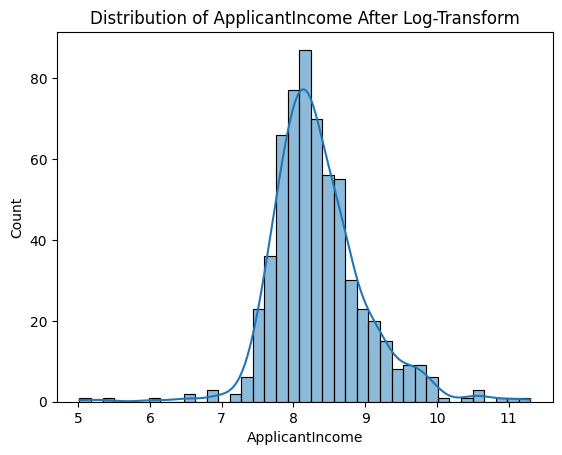

CoapplicantIncome skewness after log-transformation: -0.1731


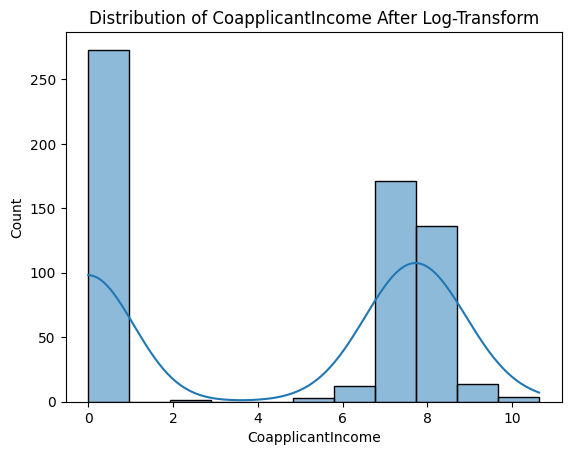

LoanAmount skewness after log-transformation: -0.1516


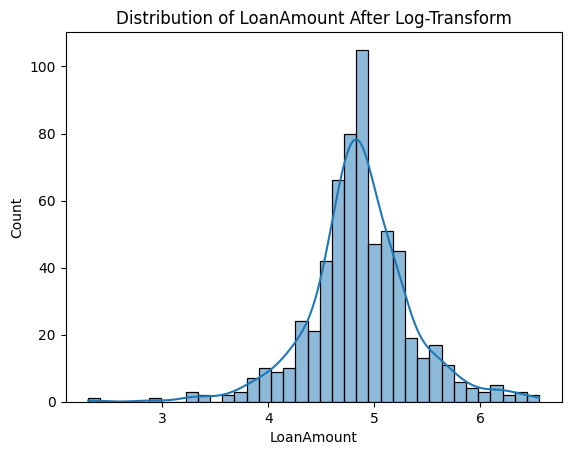

In [21]:
import numpy as np

cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in cols:
  print(f'{col} skewness before log-transformation: {loan_df[col].skew():.4f}')

loan_df['ApplicantIncome'] = np.log1p(loan_df['ApplicantIncome'])
loan_df['CoapplicantIncome'] = np.log1p(loan_df['CoapplicantIncome'])
loan_df['LoanAmount'] = np.log1p(loan_df['LoanAmount'])

for col in cols:
  print(f'{col} skewness after log-transformation: {loan_df[col].skew():.4f}')
  sns.histplot(loan_df[col], kde=True)
  plt.title(f'Distribution of {col} After Log-Transform')
  plt.show()

# Engineer Total_Income feature

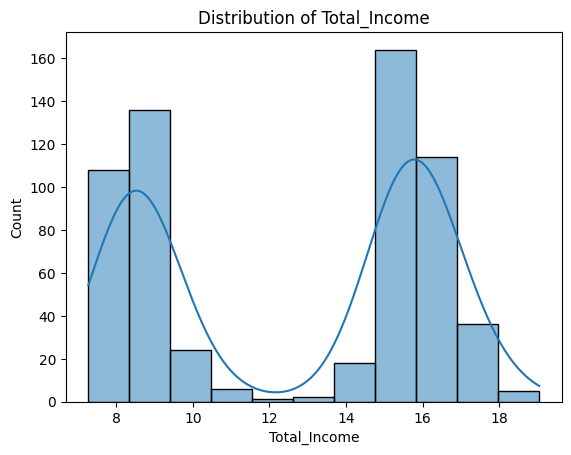

Total_Income Skewness: -0.1638


In [22]:
loan_df['Total_Income'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']

sns.histplot(loan_df['Total_Income'], kde=True)
plt.title('Distribution of Total_Income')
plt.show()
print(f'Total_Income Skewness: {loan_df["Total_Income"].skew():.4f}')

In [23]:
print(loan_df[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income']].corr())

                   ApplicantIncome  CoapplicantIncome  Total_Income
ApplicantIncome           1.000000          -0.368258     -0.212150
CoapplicantIncome        -0.368258           1.000000      0.986686
Total_Income             -0.212150           0.986686      1.000000


In [24]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income
0,1,0,0.0,1,0,8.674197,0.000000,4.859812,360.0,1.0,1,False,False,True,8.674197
1,1,1,1.0,1,0,8.430327,7.319202,4.859812,360.0,1.0,0,True,False,False,15.749530
2,1,1,0.0,1,1,8.006701,0.000000,4.204693,360.0,1.0,1,False,False,True,8.006701
3,1,1,0.0,0,0,7.857094,7.765993,4.795791,360.0,1.0,1,False,False,True,15.623087
4,1,0,0.0,1,0,8.699681,0.000000,4.955827,360.0,1.0,1,False,False,True,8.699681


Moving forward to Modeling. Credit_History, Married, Education, Property_Area_Semiurban, and Property_Area_Rural columns are significant in predicting the loan approvals.

# Modeling

In [25]:
from sklearn.model_selection import train_test_split

X = loan_df.drop(columns=['Loan_Status'])
y = loan_df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f'Training set: {X_train.shape}, Testing set: {X_test.shape}')
print(f'Training class distribution:\n{y_train.value_counts(normalize=True)}')
print(f'Testing class distribution:\n{y_test.value_counts(normalize=True)}')

Training set: (491, 14), Testing set: (123, 14)
Training class distribution:
Loan_Status
1    0.686354
0    0.313646
Name: proportion, dtype: float64
Testing class distribution:
Loan_Status
1    0.691057
0    0.308943
Name: proportion, dtype: float64


## Apply SMOTE to balance dataset

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'New training set shape: {X_train_smote.shape}, {y_train_smote.shape}')
print(f'After SMOTE, training class distribution:\n {y_train_smote.value_counts(normalize=True)}')

New training set shape: (674, 14), (674,)
After SMOTE, training class distribution:
 Loan_Status
1    0.5
0    0.5
Name: proportion, dtype: float64


## Apply Standard Scaler

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'LoanAmount', 'Loan_Amount_Term']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)

print(f'Training set: {X_train_smote.shape}, Testing set: {X_test.shape}')

Training set: (674, 14), Testing set: (123, 14)


## Train and Evaluate Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Naive Bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ])
}

for name, model in models.items():
  print(f'\nTraining {name}...')
  model.fit(X_train_smote, y_train_smote)
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  print(f'Classification Report for {name}:')
  print(classification_report(y_test, y_pred))
  print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}')


Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        38
           1       0.85      0.88      0.87        85

    accuracy                           0.81       123
   macro avg       0.78      0.77      0.78       123
weighted avg       0.81      0.81      0.81       123

ROC-AUC Score: 0.8734

Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        38
           1       0.85      0.85      0.85        85

    accuracy                           0.79       123
   macro avg       0.75      0.75      0.75       123
weighted avg       0.79      0.79      0.79       123

ROC-AUC Score: 0.7958

Training XGBoost...
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60

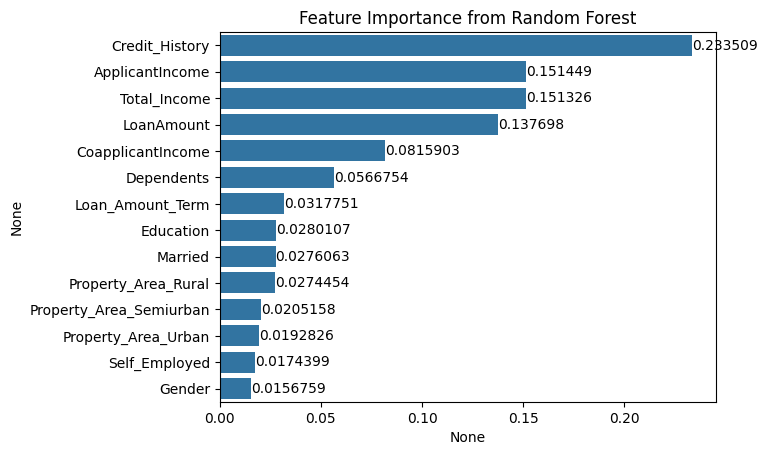

Credit_History             0.233509
ApplicantIncome            0.151449
Total_Income               0.151326
LoanAmount                 0.137698
CoapplicantIncome          0.081590
Dependents                 0.056675
Loan_Amount_Term           0.031775
Education                  0.028011
Married                    0.027606
Property_Area_Rural        0.027445
Property_Area_Semiurban    0.020516
Property_Area_Urban        0.019283
Self_Employed              0.017440
Gender                     0.015676
dtype: float64


In [29]:
rf_model = models['Random Forest']
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = sns.barplot(x=feature_importance, y=feature_importance.index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Feature Importance from Random Forest')
plt.show()
print(feature_importance)

## Randomized Search CV

1. Naive Bayes Tuning

In [30]:
from sklearn.model_selection import RandomizedSearchCV

nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

nb_param_dist = {'classifier__var_smoothing': np.logspace(-9, 0, 1000)}

nb_random = RandomizedSearchCV(nb_pipeline, nb_param_dist, n_iter=20, cv=5, scoring='roc_auc', random_state=42)
nb_random.fit(X_train_smote, y_train_smote)
print(f'Best parameters after RandomizedSearchCV: {nb_random.best_params_}')
print(f'Best ROC-AUC: {nb_random.best_score_:.4f}')

Best parameters after RandomizedSearchCV: {'classifier__var_smoothing': np.float64(0.5831305113526218)}
Best ROC-AUC: 0.7840


2. Logistic Regression Tuning

In [31]:
from sklearn.pipeline import Pipeline

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000, random_state=42))
])

lr_param_dist = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__class_weight': [None, 'balanced']
}

lr_random = RandomizedSearchCV(lr_pipeline, lr_param_dist, n_iter=20, cv=5, scoring='roc_auc', random_state=42)
lr_random.fit(X_train_smote, y_train_smote)
print(f'Best parameters after RandomizedSearchCV: {lr_random.best_params_}')
print(f'Best ROC-AUC: {lr_random.best_score_:.4f}')

Best parameters after RandomizedSearchCV: {'logreg__solver': 'saga', 'logreg__penalty': 'l1', 'logreg__class_weight': None, 'logreg__C': 1}
Best ROC-AUC: 0.8067


3. Random Forest Tuning

In [44]:
rf_param_dist = {
    'n_estimators': np.arange(5, 50, 5),
    'max_features': ['sqrt', 'log2'],
    'max_depth': np.arange(5, 15, 1),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_param_dist,
                               n_iter=20,
                               cv=5,
                               scoring='roc_auc',
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X_train_smote, y_train_smote)
print(f'Best parameters after RandomizedSearchCV: {rf_random.best_params_}')
print(f'Best ROC-AUC: {rf_random.best_score_:.4f}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters after RandomizedSearchCV: {'n_estimators': np.int64(40), 'min_samples_split': np.int64(6), 'min_samples_leaf': np.int64(3), 'max_features': 'sqrt', 'max_depth': np.int64(11), 'bootstrap': False}
Best ROC-AUC: 0.8831


4. XG Boost Classifier

In [33]:
xg_param_dist = {
    'n_estimators': np.arange(5, 50, 5),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': np.arange(5, 15, 1),
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

xg_random = RandomizedSearchCV(XGBClassifier(),
                               param_distributions=xg_param_dist,
                               n_iter=20,
                               cv=5,
                               scoring='roc_auc',
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

xg_random.fit(X_train_smote, y_train_smote)
print(f'Best parameters after RandomizedSearchCV: {xg_random.best_params_}')
print(f'Best ROC-AUC: {xg_random.best_score_:.4f}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters after RandomizedSearchCV: {'subsample': 0.8, 'n_estimators': np.int64(25), 'max_depth': np.int64(14), 'learning_rate': 0.1}
Best ROC-AUC: 0.8724


## Grid Search CV

1. Naive Bayes

In [35]:
from sklearn.model_selection import GridSearchCV

best_smoothing = 0.5831305113526218
nb_param_grid = {
    'classifier__var_smoothing': np.linspace(best_smoothing/2, best_smoothing*2, 10)
}

nb_grid = GridSearchCV(
    nb_pipeline,
    param_grid=nb_param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

nb_grid.fit(X_train_smote, y_train_smote)
print(f'Best parameters after GridSearchCV: {nb_grid.best_params_}')
print(f'Best ROC-AUC: {nb_grid.best_score_:.4f}')

best_nb = nb_grid.best_estimator_
y_pred_nb = best_nb.predict(X_test)
y_pred_proba_nb = best_nb.predict_proba(X_test)[:, 1]
print('Classification Report for Tuned Naive Bayes (GridSearchCV):')
print(classification_report(y_test, y_pred_nb))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_nb):.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters after GridSearchCV: {'classifier__var_smoothing': np.float64(1.1662610227052437)}
Best ROC-AUC: 0.7862
Classification Report for Tuned Naive Bayes (GridSearchCV):
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        38
           1       0.86      0.93      0.89        85

    accuracy                           0.85       123
   macro avg       0.83      0.79      0.81       123
weighted avg       0.84      0.85      0.84       123

ROC-AUC Score: 0.8483


2. Logistic Regression

In [36]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000, random_state=42))
])

lr_param_grid = {
    'classifier__C': [0.5, 1, 1.5],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['saga'],
    'classifier__class_weight': [None]
}

lr_grid = GridSearchCV(
    lr_pipeline,
    param_grid=lr_param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

lr_grid.fit(X_train_smote, y_train_smote)
print(f'Best parameters after GridSearchCV: {lr_grid.best_params_}')
print(f'Best ROC-AUC: {lr_grid.best_score_:.4f}')

best_lr = lr_grid.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_pred_proba_lr = best_lr.predict_proba(X_test)[:, 1]
print('Classification Report for Tuned Logistic Regression (GridSearchCV):')
print(classification_report(y_test, y_pred_lr))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters after GridSearchCV: {'classifier__C': 1.5, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best ROC-AUC: 0.8066
Classification Report for Tuned Logistic Regression (GridSearchCV):
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        38
           1       0.87      0.91      0.89        85

    accuracy                           0.84       123
   macro avg       0.81      0.80      0.80       123
weighted avg       0.83      0.84      0.83       123

ROC-AUC Score: 0.8783


3. Random Forest Classifier

In [45]:
rf =  RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [40, 45, 50],
    'max_features': ['log2'],
    'max_depth': [15, 20, 25],
    'min_samples_split': [4, 8],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

rf_grid = GridSearchCV(
    rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

rf_grid.fit(X_train_smote, y_train_smote)
print(f'Best parameters after GridSearchCV: {rf_grid.best_params_}')
print(f'Best ROC-AUC: {rf_grid.best_score_:.4f}')

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
print('Classification Report for Tuned Random Forest (GridSearchCV):')
print(classification_report(y_test, y_pred_rf))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters after GridSearchCV: {'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 45}
Best ROC-AUC: 0.8859
Classification Report for Tuned Random Forest (GridSearchCV):
              precision    recall  f1-score   support

           0       0.64      0.61      0.62        38
           1       0.83      0.85      0.84        85

    accuracy                           0.77       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.77      0.77      0.77       123

ROC-AUC Score: 0.7752


4. XG Boost Classifier

In [41]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

xgb_param_grid = {
    'n_estimators': [25, 30, 40],
    'learning_rate': [0.05, 0.1, 0.01],
    'max_depth': [10, 15, 20],
    'subsample': [0.75, 0.8, 0.9]
}

xgb_grid = GridSearchCV(
    xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

xgb_grid.fit(X_train_smote, y_train_smote)
print(f'Best parameters after GridSearchCV: {xgb_grid.best_params_}')
print(f'Best ROC-AUC: {xgb_grid.best_score_:.4f}')

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
print('Classification Report for Tuned XGBoost (GridSearchCV):')
print(classification_report(y_test, y_pred_xgb))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters after GridSearchCV: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 40, 'subsample': 0.75}
Best ROC-AUC: 0.8797
Classification Report for Tuned XGBoost (GridSearchCV):
              precision    recall  f1-score   support

           0       0.61      0.66      0.63        38
           1       0.84      0.81      0.83        85

    accuracy                           0.76       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.77      0.76      0.77       123

ROC-AUC Score: 0.7882


Logistic Regression is the best overall model:

It has the highest test set ROC-AUC (0.8783), indicating excellent discrimination ability.

It ties with Naive Bayes for the best F1-score for class 0 (0.72), ensuring good performance on the minority class (rejected loans).

It has high accuracy (0.84) and is interpretable, which is valuable for a loan prediction app where you might need to explain decisions to stakeholders.

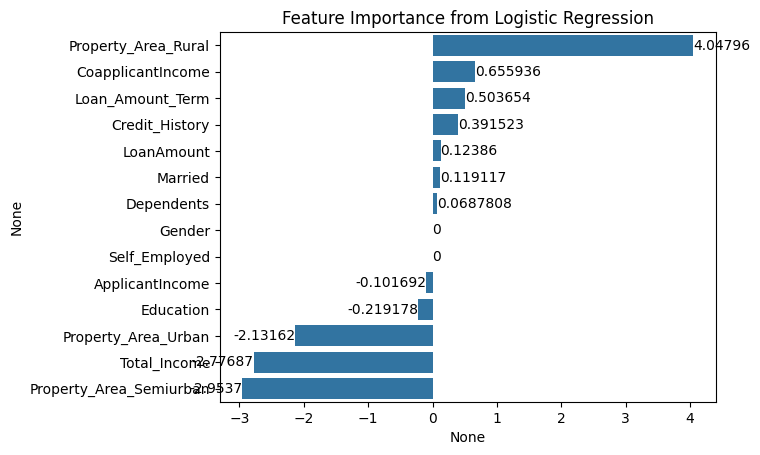

Logistic Regression Feature Importance:
Property_Area_Rural        4.047955
CoapplicantIncome          0.655936
Loan_Amount_Term           0.503654
Credit_History             0.391523
LoanAmount                 0.123860
Married                    0.119117
Dependents                 0.068781
Gender                     0.000000
Self_Employed              0.000000
ApplicantIncome           -0.101692
Education                 -0.219178
Property_Area_Urban       -2.131624
Total_Income              -2.776870
Property_Area_Semiurban   -2.953697
dtype: float64


In [81]:
lr_model = best_lr.named_steps['classifier']
lr_feature_importance = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(ascending=False)

ax = sns.barplot(x=lr_feature_importance, y=lr_feature_importance.index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Feature Importance from Logistic Regression')
plt.show()

print("Logistic Regression Feature Importance:")
print(lr_feature_importance)

In [82]:
import joblib

best_model = best_lr
joblib.dump(best_model, 'loan_prediction_model.pkl')

['loan_prediction_model.pkl']